In [32]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('./BankChurners.csv', sep=',')
df = data.copy()
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [34]:
# Limpeza de dados inicial: A fonte de onde retiramos a base de dados sugere ignorarmos as duas ultimas colunas.
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1,
        inplace=True
       )

In [35]:
list(df.columns)
# Attrition Flag é o que caracteriza se o cliente permanece ou não utilizando os serviços de cartão.

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [36]:
#A principio não há valores nulos ou nans mas podem haver outros tipos de erros
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [37]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [38]:
# buscando quais colunas contém valores numericos
list(df.select_dtypes(include=np.number))

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [39]:
# retornamos a descrição de dados Numericos
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [40]:
# retornamos apenas os dados categoricos
# Income e Education são dados ordinais
# os demais são nominais
# Logo de cara notamos dentro da base de clientes que: 
# 1 Há mais clientes mulheres
# 2 Boa parte dos clientes tem um income abaixo de 40k
# 3 A vasta maioria dos cartões é Blue


df.describe(include=['object'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [41]:
# ajeitar algumas colunas para facilitar a legibilidade
df.columns = df.columns.str.replace('_', ' ')
df.head(5)

,CLIENTNUM,Attrition Flag,Customer Age,Gender,Dependent count,Education Level,Marital Status,Income Category,Card Category,Months on book,...,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [42]:
df.rename(columns= {'CLIENTNUM': 'Client Number', 'Customer Age': 'Age',
                    'Attrition Flag': 'Acc status','Education Level':'Education',
                    'Income_Category':'Income', 'Dependent_count': 'Dependents'}, inplace=True)
df.head(2)

,Client Number,Acc status,Age,Gender,Dependent count,Education,Marital Status,Income Category,Card Category,Months on book,...,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [43]:
# df.replace({'Education Level':{'Unknown': np.nan},
#                   'Marital Status':{'Unknown': np.nan},
#                   'Income ategory':{'Unknown': np.nan}
#                 }, inplace = True)

**DADOS SOBRE O CLIENTE:**

Age - Idade

Gender - Genero

Dependents - Qtd dependentes

Education - Nível educacional - **há valores uknown

Marital status - Estado Civil - **há valores uknown

Income - Nível de Renda

**DADOS SOBRE PRODUTO E RELACAO C/ CLIENTE**

Attrition Flag - status da conta aberta/fechada

Months on book - Tempo como cliente

Card category - tipo de cartão

Credit limit - limite de crédito

Avg_Utilization_Ratio - média de utilização *metodologia de calculo não informada

Total Revolving Bal - crédito rotativo, carregado para o mes seguinte ao efetuar pagamento minimo da fatura

DEMAIS DADOS NÃO ESTÃO CLAROS

**PERGUNTAS**

O tipo de cartão está relacionado com o churn? - Carlos

Limite de crédito e churn estão correlacionados? - Carlos

Tempo como cliente afeta o churn? - Igor

Average utilization ratio está relacionado com churn? quanto mais baixo maior o churn? - Igor

relação income / churn - Thiago

relaçao marital status / churn - Renato

total amount transactions / churn????? - Renato

Quais variaveis/atributos mais afetam o churn? - Paulo

Quais as diferenças entre clientes atritados e remanecentes - Paulo

In [44]:
# pp.ProfileReport(df, title='Churn Explorative Analysis', explorative=True)

In [45]:
# Quais variaveis/atributos mais afetam o churn? - Paulo
# diferenças entre clientes atritados e remanecentes - Paulo


In [46]:
churned = df[df['Acc status'] == 'Attrited Customer']
n_churned = df[df['Acc status'] == 'Existing Customer']

In [47]:
churn_ratio = churned.shape[0]/df.shape[0]
churn_ratio
print(f'O churn ratio é aproximadamente {churn_ratio*100:.2f}% do total de clientes')

O churn ratio é aproximadamente 16.07% do total de clientes


In [48]:
# explorando a distribuição entre clientes atritados/existentes por genero
# apesar de termos mais clientes mulheres na base total, elas são minoria nos clientes existentes
# e leve maioria em atritados
gndr_atr = pd.crosstab(df['Gender'], df['Acc status'], normalize='index', margins = True, margins_name= 'Total %')
gndr_atr

Acc status,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848
Total %,0.160660,0.839340


In [49]:
gndr_atr.index

Index(['F', 'M', 'Total %'], dtype='object', name='Gender')

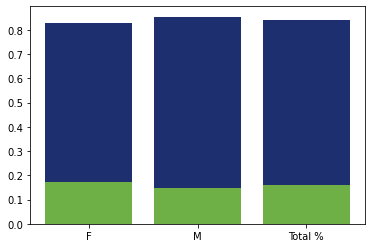

In [50]:
plt.bar(gndr_atr.index, height=gndr_atr['Existing Customer'], color='#1D2F6F')
plt.bar(gndr_atr.index, height=gndr_atr['Attrited Customer'], color = '#6EAF46')
plt.labels = ['F', 'M', 'Total %']
plt.show()

In [51]:
# a vasta maioria dos cartões é Blue em ambos os grupos
card_matrix = pd.crosstab(df['Card Category'], df['Acc status'], normalize='all', margins = True, margins_name= 'Total')
card_matrix

Acc status,Attrited Customer,Existing Customer,Total
Card Category,,,
Blue,0.149995,0.781772,0.931767
Gold,0.002074,0.009381,0.011455
Platinum,0.000494,0.001481,0.001975
Silver,0.008097,0.046707,0.054804
Total,0.160660,0.839340,1.000000


In [52]:
# Categoria do cartão por status

card_churn = churned.groupby('Card Category')[['Acc status']].count()
card_churn['Proportion %'] = (card_churn['Acc status']/len(churned))
card_churn

,Acc status,Proportion %
Card Category,,
Blue,1519,0.933620
Gold,21,0.012907
Platinum,5,0.003073
Silver,82,0.050400


In [53]:
card_nchurn = n_churned.groupby('Card Category')[['Acc status']].count()
card_nchurn['Proportion %'] = (card_nchurn['Acc status']/len(n_churned))
card_nchurn

,Acc status,Proportion %
Card Category,,
Blue,7917,0.931412
Gold,95,0.011176
Platinum,15,0.001765
Silver,473,0.055647


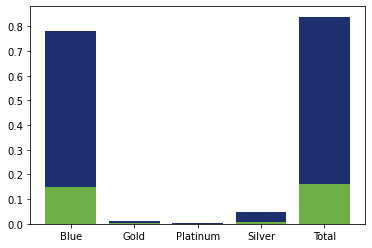

In [68]:
plt.bar(card_matrix.index, height=card_matrix['Existing Customer'], color='#1D2F6F')
plt.bar(card_matrix.index, height=card_matrix['Attrited Customer'], color = '#6EAF46')
plt.labels = ['Blue', 'Gold', 'Platinum', 'Silver','Total']
plt.show()

In [65]:
df.groupby('Income Category').count()

,Client Number,Acc status,Age,Gender,Dependent count,Education,Marital Status,Card Category,Months on book,Total Relationship Count,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
Income Category,,,,,,,,,,,,,,,,,,,,
$120K +,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727
$40K - $60K,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790
$60K - $80K,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402,1402
$80K - $120K,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535,1535
Less than $40K,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561
Unknown,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112


In [64]:
# quase 10% dos clientes não possuem informações referentes a Income
income_matrix = pd.crosstab(df['Income Category'], df['Acc status'], margins=True, margins_name='Total',normalize='index')
income_matrix.drop('Total', axis=0, inplace=True)
income_matrix

Acc status,Attrited Customer,Existing Customer
Income Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138
Unknown,0.168165,0.831835


In [25]:
inc_nchurn = n_churned.groupby('Income Category')[['Acc status']].count()
inc_nchurn['Proportion %'] = (inc_nchurn['Acc status']/len(n_churned))
inc_nchurn

,Acc status,Proportion %
Income Category,,
$120K +,601,0.070706
$40K - $60K,1519,0.178706
$60K - $80K,1213,0.142706
$80K - $120K,1293,0.152118
Less than $40K,2949,0.346941
Unknown,925,0.108824


In [24]:
# no grupo de clientes churnados temos uma proporção parecida ao do grupo de clientes remanescentes
# porém um leve aumento no grupo que recebe Less than $40K	
inc_churn = churned.groupby('Income Category')[['Acc status']].count()
inc_churn['Proportion %'] = (inc_churn['Acc status']/len(churned))
inc_churn

,Acc status,Proportion %
Income Category,,
$120K +,126,0.077443
$40K - $60K,271,0.166564
$60K - $80K,189,0.116165
$80K - $120K,242,0.148740
Less than $40K,612,0.376152
Unknown,187,0.114935


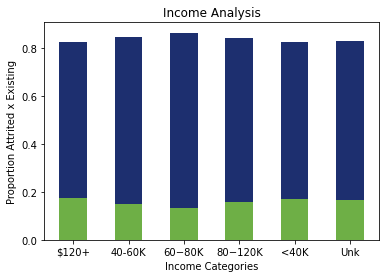

In [275]:
plt.bar(income_matrix.index, height=income_matrix['Existing Customer'], color='#1D2F6F', width=0.5)
plt.bar(income_matrix.index, height=income_matrix['Attrited Customer'], color = '#6EAF46', width=0.5)
x = [0,1,2,3,4,5]
labels=['$120+', '40-60K', '60−80K', '80−120K', '<40K', 'Unk']
plt.xticks(x,labels, rotation='0', rotation_mode='anchor')
plt.title("Income Analysis")
plt.xlabel("Income Categories")
plt.ylabel("Proportion Attrited x Existing")
plt.show()

In [14]:
edu_matrix = pd.crosstab(df['Education'], df['Acc status'], margins=True, margins_name='Total',normalize='index')
edu_matrix.drop('Total', axis=0,inplace=True)
edu_matrix

Acc status,Attrited Customer,Existing Customer
Education,,
College,0.152024,0.847976
Doctorate,0.210643,0.789357
Graduate,0.155691,0.844309
High School,0.152012,0.847988
Post-Graduate,0.178295,0.821705
Uneducated,0.159381,0.840619
Unknown,0.168532,0.831468


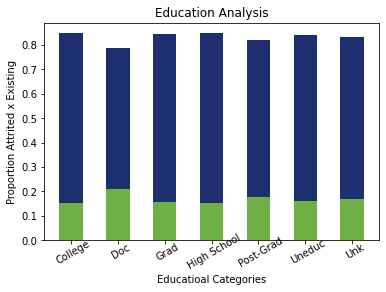

In [280]:
plt.bar(edu_matrix.index, height=edu_matrix['Existing Customer'], color='#1D2F6F', width=0.5)
plt.bar(edu_matrix.index, height=edu_matrix['Attrited Customer'], color = '#6EAF46', width=0.5)
x = [0,1,2,3,4,5,6]
labels=['College', 'Doc', 'Grad', 'High School', 'Post-Grad', 'Uneduc', 'Unk']
plt.xticks(x,labels, rotation='30', rotation_mode='anchor')
plt.title("Education Analysis")
plt.xlabel("Educatioal Categories")
plt.ylabel("Proportion Attrited x Existing")
plt.show()

In [16]:
educ_nchurn = n_churned.groupby('Education')[['Acc status']].count()
educ_nchurn['Proportion %'] = (educ_nchurn['Acc status']/len(n_churned))
educ_nchurn

,Acc status,Proportion %
Education,,
College,859,0.101059
Doctorate,356,0.041882
Graduate,2641,0.310706
High School,1707,0.200824
Post-Graduate,424,0.049882
Uneducated,1250,0.147059
Unknown,1263,0.148588


In [23]:
# um olhar sobre os clientes churnados mostra que há uma concentração maior de clientes
# graduados(29.9%) seguidos highschoolers (18.8%) porém em menor proporção ao não churnados
# já o grupo de Doctorate e Post-Graduate tem um ligeiro aumento

educ_churn = churned.groupby('Education')[['Acc status']].count()
educ_churn['Proportion %'] = (educ_churn['Acc status']/len(churned))
educ_churn

,Acc status,Proportion %
Education,,
College,154,0.094653
Doctorate,95,0.058390
Graduate,487,0.299324
High School,306,0.188076
Post-Graduate,92,0.056546
Uneducated,237,0.145667
Unknown,256,0.157345


In [215]:
df.groupby(['Gender'])[['Credit Limit']].mean()

,Credit Limit
Gender,
F,5023.854274
M,12685.674963


In [41]:
gender_churn = churned.groupby('Gender')[['Acc status']].count()
gender_churn['Proportion %'] = (gender_churn['Acc status']/len(churned))
gender_churn

,Acc status,Proportion %
Gender,,
F,930,0.571604
M,697,0.428396


In [42]:
gender_n_churn = n_churned.groupby('Gender')[['Acc status']].count()
gender_n_churn['Proportion %'] = (gender_n_churn['Acc status']/len(n_churned))
gender_n_churn

,Acc status,Proportion %
Gender,,
F,4428,0.520941
M,4072,0.479059


Index(['Proportion %'], dtype='object')

In [49]:
genderdiff = gender_n_churn[['Proportion %']] - gender_churn[['Proportion %']]
genderdiff

,Proportion %
Gender,
F,-0.050663
M,0.050663


In [209]:
group_churn = churned.groupby(['Income Category'])[['Income Category']].count()
group_churn['Proportion %'] = (group_churn['Income Category']/[1627,1627,1627,1627,1627,1627])*100
group_churn

,Income Category,Proportion %
Income Category,,
$120K +,126,7.744315
$40K - $60K,271,16.656423
$60K - $80K,189,11.616472
$80K - $120K,242,14.874001
Less than $40K,612,37.615243
Unknown,187,11.493546


In [207]:
group_nchurn = n_churned.groupby(['Income Category'])[['Income Category']].count()
group_nchurn['Proportion %'] = (group_nchurn['Income Category']/[8500,8500,8500,8500,8500,8500])*100
group_nchurn

,Income Category,Proportion %
Income Category,,
$120K +,601,7.070588
$40K - $60K,1519,17.870588
$60K - $80K,1213,14.270588
$80K - $120K,1293,15.211765
Less than $40K,2949,34.694118
Unknown,925,10.882353


In [287]:
diff = group_nchurn[['Proportion %']] - group_churn[['Proportion %']]
diff

,Proportion %
Income Category,
$120K +,-0.673726
$40K - $60K,1.214165
$60K - $80K,2.654116
$80K - $120K,0.337763
Less than $40K,-2.921125
Unknown,-0.611193


In [26]:
# utilização média do cartão por status 
avg_use = df.groupby("Acc status")[['Avg Utilization Ratio']].mean()
avg_use

,Avg Utilization Ratio
Acc status,
Attrited Customer,0.162475
Existing Customer,0.296412


In [27]:
# Chama a atenção o Total Revolving Bal - que é o revolving balance, ou seja
# o valor não pago do cartão que é carregado para o mês seguinte,
# os clientes remanescentes possuem quase o dobro de revolve
df.groupby(["Acc status"]).agg(['mean']).T.style.background_gradient()

,Acc status,Attrited Customer,Existing Customer
Client Number,mean,735261381.263675,739927217.885294
Age,mean,46.659496,46.262118
Dependent count,mean,2.402581,2.335412
Months on book,mean,36.178242,35.880588
Total Relationship Count,mean,3.279656,3.914588
Months Inactive 12 mon,mean,2.693301,2.273765
Contacts Count 12 mon,mean,2.972342,2.356353
Credit Limit,mean,8136.039459,8726.877518
Total Revolving Bal,mean,672.822987,1256.604118
Avg Open To Buy,mean,7463.216472,7470.273400


In [28]:
# Perguntas
# Quais variaveis/atributos mais afetam o churn? - Paulo
# diferenças entre clientes atritados e remanecentes - Paulo

# Resposta 1: 

# A vasta maioria dos clientes churnados utiliza o cartão Blue
# Por isso é mais importante ficar de olho nesta categoria de cartões, o que não significa
# necessariamente que o tipo de cartão seja a causa do churn -correlação não implica causalidade-
# Um ponto a se atentar é que há clientes de alta renda 80K+ com o cartão Blue, logo,
# isso nos levanta a possibilidade destes clientes também possuirem cartões de concorrentes
# e serem churners potenciais
# E mostra a necessidade de melhor forma de adequação do produto Cartão em relação aos clientes e seus dados demogaficos

# Avg_Utilization_Ratio aparetemente possui forte relação com o nivel de Churn
# Os clientes atritados possuem quase metade da utilização
# 16.24% vs 29.64%
Attrited Customer	16.24
Existing Customer	29.64

# Resposta 2: 
# Há poucas diferenças signiticativas entre clientes atritados e remanescentes.
# Dentro do grupo de churn há uma leve maioria de clientes atritados do genero feminino

# explorando a distribuição entre clientes atritados/existentes por genero
# apesar de termos mais clientes mulheres na base total, elas são minoria nos clientes existentes
# e leve maioria em atritados
No grupo de churn
F	57.16
M	42.84
No grupo remanescente
F	52.09
M	47.90

# Chama a atenção o Total Revolving Bal - que é o revolving balance, ou seja
# o valor não pago do cartão que é carregado para o mês seguinte,
# os clientes remanescentes possuem quase o dobro de revolve,
# somando isso ao  Avg utilization ratio, pode ser uma indicação de uma dependencia maior do cartão no dia a dia.
Mean - Total Revolving Bal		
Churnados   Non Churn
672.82	    1256.60

# no grupo de clientes churnados temos uma proporção parecida ao do grupo de clientes remanescentes
# porém um leve aumento no grupo que recebe Less than $40K
grupo de churn
Less than $40K 37.62%
grupo remanescente
Less than $40K 34.69%

# um olhar sobre os clientes churnados mostra que há uma concentração maior de clientes
# graduados(29.9%) seguidos highschoolers (18.8%)
# comparando grupo a grupo chama a atenção que a proporção de churn em Doctorates e Post-Graduate é
# maior que os demais grupos, isso pode indicar um churn maior entre clientes de maior nivel educacional

Grupo Churn            Grupo nChurn                Total
High School	  18.81% High School    20.08%         19.88%
Graduate      29.93% Graduate       31.07%         30.89%
Doctorate	   5.84% Doctorate	     4.19%          4.45%
Post-Graduate  5.65% Post-Graduate   4.99           5.09%









SyntaxError: invalid syntax (<ipython-input-28-508fc3bd4e69>, line 16)

In [28]:
df.groupby('Education').count()

,Client Number,Acc status,Age,Gender,Dependents,Marital Status,Income,Card Category,Months on book,Total Relationship Count,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
Education,,,,,,,,,,,,,,,,,,,,
College,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013
Doctorate,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451
Graduate,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128
High School,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
Post-Graduate,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516
Uneducated,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
Unknown,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519


In [148]:
# fatores que poderiam contribuir com uma analise mais acurada

 suggested that it is theoretically more profitable to
segment and target customers on the basis of their (changing) purchase behaviours and
service experiences

(12, 1)

In [30]:
df.shape

(10127, 21)

In [42]:
df.describe(include='object')

,Acc status,Gender,Education,Marital Status,Income Category,Card Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436
